# SMAD3

Pathogenic variants in SMAD3 are associated with [Loeys-Dietz syndrome 3 (LDS3)](https://omim.org/entry/613795).

SMAD3 is a direct mediator of transcriptional activation by the TGF-betaTGF-β receptor -  active TGF-β binds to TGFβRII, which recruits and activates TGFβRI through phosphorylated the GS domain in TGFβRI. TGFβRI phosphorylates and activates Smad2 and Smad3 (R-Smads).

LDS3 is  autosomal dominant syndromic form of thoracic aortic aneurysms and dissections characterised by the presence of arterial aneurysms and tortuosity, mild craniofacial, skeletal and cutaneous anomalies, and early-onset osteoarthritis. ([van der Laar et al., 2012](https://pubmed.ncbi.nlm.nih.gov/22167769/)).

We performed the following PubMed query on 2024-09-24

  
```bash
  (Loeys-Dietz syndrome type 3 OR LDS3 OR "Loeys-Dietz syndrome 3") AND (SMAD3 OR "SMAD3 variants" OR "SMAD3 mutations") AND ("genotype phenotype correlation"    OR " phenotype genotype correlation")
```
This query returned on article, [PMID:31915033](https://pubmed.ncbi.nlm.nih.gov/31915033/), which did not describe GPC analysis of variants specific to the SMAD3 gene.

In [1]:
import gpsea
import hpotk

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo()
print(f'Loaded HPO v{hpo.version}')
print(f"Using genophenocorr version {gpsea.__version__}")

Loaded HPO v2025-01-16
Using genophenocorr version 0.9.4


### SMAD3
We user the [Matched Annotation from NCBI and EMBL-EBI (MANE)](https://www.ncbi.nlm.nih.gov/refseq/MANE/) transcript and the corresponding protein identifier for SMAD3.

In [2]:
from gpsea.preprocessing import configure_default_protein_metadata_service
gene_symbol = 'SMAD3'
mane_tx_id = 'NM_005902.4'
mane_protein_id = 'NP_005893.1' # mothers against decapentaplegic homolog 3 isoform 1 
pms = configure_default_protein_metadata_service()
protein_meta = pms.annotate(mane_protein_id)

### Phenopackets

In [3]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

phenopacket_store_release = '0.1.24'
registry = configure_phenopacket_registry()

with registry.open_phenopacket_store(release=phenopacket_store_release) as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))

cohort_creator = configure_caching_cohort_creator(hpo)
cohort, qc = load_phenopackets(
    phenopackets=phenopackets, 
    cohort_creator=cohort_creator,
)
qc.summarize()

Individuals Processed: 100%|██████████| 49/49 [00:00<00:00, 807.00 individuals/s]
Validated under permissive policy
No errors or warnings were found


In [4]:
from gpsea.view import CohortViewer

cv = CohortViewer(hpo)
cv.process(cohort, transcript_id=mane_tx_id)

n,HPO Term
26,Osteoarthritis
26,Aortic aneurysm
23,Soft skin
20,Scoliosis
18,Intervertebral disk degeneration
14,Varicose veins
13,Hypertelorism
13,Bifid uvula
13,Osteochondritis dissecans
12,High palate


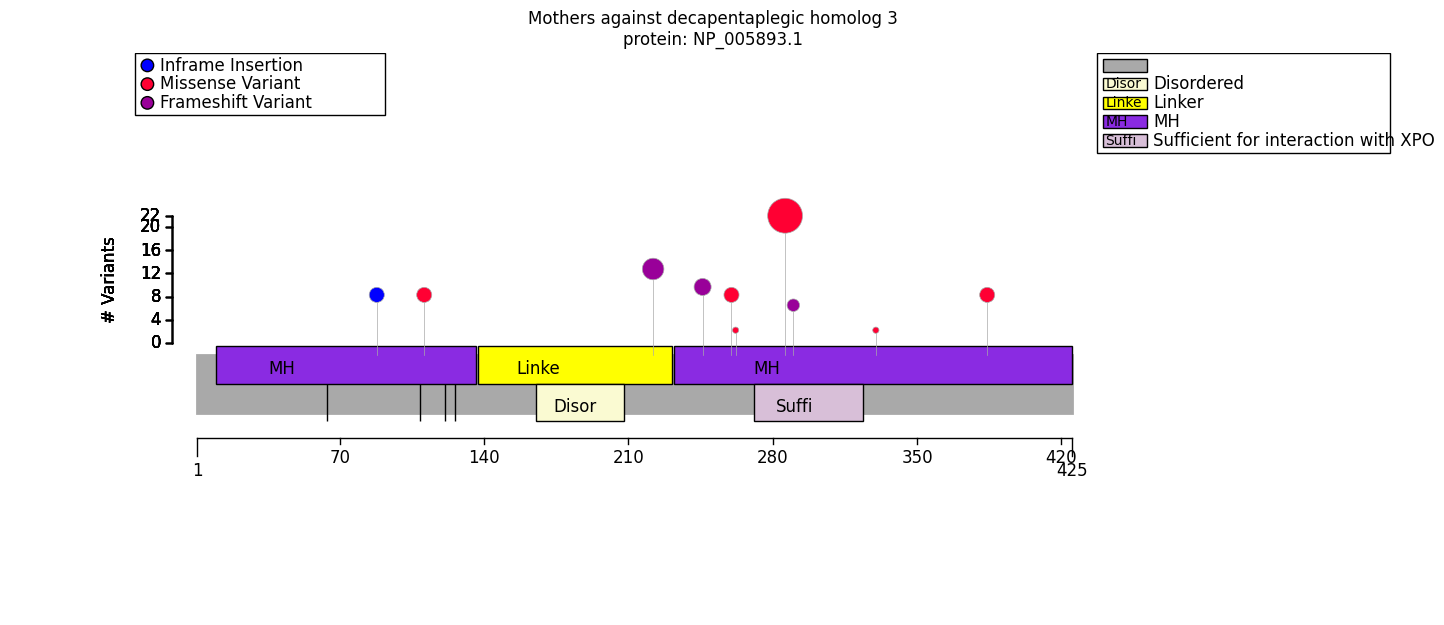

In [5]:
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt

smad3_fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein(
    protein_metadata=protein_meta,
    cohort=cohort,
    ax=ax,
)
smad3_fig.tight_layout()

# Genotype-Phenotype Correlation (GPC) Analysis

In [6]:
from gpsea.analysis.pcats import configure_hpo_term_analysis
from gpsea.analysis.clf import prepare_classifiers_for_terms_of_interest

analysis = configure_hpo_term_analysis(hpo)
pheno_clfs = prepare_classifiers_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

In [7]:
from gpsea.model import VariantEffect
from gpsea.view import MtcStatsViewer
from gpsea.analysis.clf import monoallelic_classifier
from gpsea.analysis.predicate import variant_effect

missense_pred = variant_effect(VariantEffect.MISSENSE_VARIANT, mane_tx_id)
splice = variant_effect(VariantEffect.SPLICE_REGION_VARIANT, mane_tx_id)

missense_clf = monoallelic_classifier(
    a_predicate=missense_pred,
    b_predicate=~missense_pred,
    a_label="missense",
    b_label="other"
)

missense_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=missense_clf,
    pheno_clfs=pheno_clfs,
)

viewer = MtcStatsViewer()
viewer.process(missense_result)

Code,Reason,Count
HMF01,Skipping term with maximum frequency that was less than threshold 0.4,9
HMF03,Skipping term because of a child term with the same individual counts,4
HMF08,Skipping general term,42
HMF09,Skipping term with maximum annotation frequency that was less than threshold 0.4,43


In [8]:
from gpsea.view import summarize_hpo_analysis

summarize_hpo_analysis(hpo=hpo, result=missense_result)

Allele group,missense,other,Corrected p values,p values
Bifid uvula [HP:0000193],12/26 (46%),1/12 (8%),0.268574,0.029976
Inguinal hernia [HP:0000023],11/26 (42%),1/13 (8%),0.268574,0.033572
Umbilical hernia [HP:0001537],11/26 (42%),1/13 (8%),0.268574,0.033572
Intervertebral disk degeneration [HP:0008419],17/18 (94%),1/2 (50%),1.000000,0.194737
Osteoarthritis [HP:0002758],21/28 (75%),5/10 (50%),1.000000,0.234685
Hypertelorism [HP:0000316],11/25 (44%),2/10 (20%),1.000000,0.259090
Joint hypermobility [HP:0001382],7/24 (29%),5/12 (42%),1.000000,0.479332
Varicose veins [HP:0002619],12/20 (60%),2/2 (100%),1.000000,0.515152
Aortic aneurysm [HP:0004942],16/32 (50%),10/16 (62%),1.000000,0.542124
Arterial tortuosity [HP:0005116],9/19 (47%),2/7 (29%),1.000000,0.657609


In [9]:
from gpsea.analysis.predicate import variant_key

arg287trp = variant_key("15_67181441_67181441_C_T") # p.Arg287Trp
arg287trp_clf = monoallelic_classifier(
    a_predicate=arg287trp,
    b_predicate= ~arg287trp,
    a_label='p.Arg287Trp', 
    b_label='Other'
)
arg287trp_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=arg287trp_clf,
    pheno_clfs=pheno_clfs,
)

summarize_hpo_analysis(hpo, arg287trp_result)

Allele group,p.Arg287Trp,Other,Corrected p values,p values
Osteoarthritis [HP:0002758],19/19 (100%),7/19 (37%),0.000856,0.000037
Bifid uvula [HP:0000193],10/16 (62%),3/22 (14%),0.051449,0.004474
Inguinal hernia [HP:0000023],8/15 (53%),4/24 (17%),0.175724,0.030561
Umbilical hernia [HP:0001537],8/15 (53%),4/24 (17%),0.175724,0.030561
Varicose veins [HP:0002619],11/19 (58%),3/3 (100%),0.901719,0.272727
Intervertebral disk degeneration [HP:0008419],16/17 (94%),2/3 (67%),0.901719,0.284211
Joint hypermobility [HP:0001382],3/14 (21%),9/22 (41%),0.901719,0.292484
Soft skin [HP:0000977],11/15 (73%),12/22 (55%),0.901719,0.313641
Hypertelorism [HP:0000316],7/16 (44%),6/19 (32%),1.000000,0.503061
Aortic aneurysm [HP:0004942],10/21 (48%),16/27 (59%),1.000000,0.560817


In [10]:
from gpsea.analysis.clf import sex_classifier

mf_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=sex_classifier(),
    pheno_clfs=pheno_clfs,
)

summarize_hpo_analysis(hpo, mf_result)

Sex,FEMALE,MALE,Corrected p values,p values
Soft skin [HP:0000977],12/14 (86%),11/23 (48%),0.780888,0.035495
Abnormal sternum morphology [HP:0000766],0/6 (0%),6/14 (43%),1.000000,0.114886
Osteoarthritis [HP:0002758],14/17 (82%),12/21 (57%),1.000000,0.161150
Varicose veins [HP:0002619],10/13 (77%),4/9 (44%),1.000000,0.186997
Aortic aneurysm [HP:0004942],10/22 (45%),16/26 (62%),1.000000,0.384026
Arterial tortuosity [HP:0005116],8/16 (50%),3/10 (30%),1.000000,0.427864
High palate [HP:0000218],4/5 (80%),8/15 (53%),1.000000,0.602683
Bifid uvula [HP:0000193],6/15 (40%),7/23 (30%),1.000000,0.728084
Scoliosis [HP:0002650],8/19 (42%),12/24 (50%),1.000000,0.759945
Vascular dilatation [HP:0002617],10/10 (100%),16/16 (100%),1.000000,1.000000


## Summary
There was no evidence of a correlation between missense variants and specific phenotypic abnormalities. In contrast, there was
a statistically significant correlation with pArg287Trp and Osteoarthritic and Bifid uvula. The residue Arg287 is located in the 
Mad homology 2 (MH2) domain in a region that mediates interaction with exportin 4 (XPO4) ([Kurisaki A, et al.,  2006](https://pubmed.ncbi.nlm.nih.gov/16449645/)).

In [11]:
from gpseacs.report import GpseaAnalysisReport, GPAnalysisResultSummary

fet_results = (
    GPAnalysisResultSummary.from_multi(
        result=missense_result,
    ),
    GPAnalysisResultSummary.from_multi(
        result=arg287trp_result,
    ),
    GPAnalysisResultSummary.from_multi(
        result=mf_result,
    ),
)

caption = """There was no evidence of a correlation between missense variants and specific phenotypic abnormalities.
In contrast, there was a statistically significant correlation with pArg287Trp and Osteoarthritis. 
The residue  Arg287 is located in the Mad homology 2 (MH2) domain in a region that mediates interaction 
with exportin 4 (XPO4) \\cite{PMID_16449645}."""
report = GpseaAnalysisReport(name=gene_symbol, 
                             cohort=cohort, 
                             fet_results=fet_results,
                             gene_symbol=gene_symbol,
                             mane_tx_id=mane_tx_id,
                             mane_protein_id=mane_protein_id,
                             caption=caption)

In [12]:
from gpseacs.report import GpseaNotebookSummarizer
summarizer = GpseaNotebookSummarizer(hpo=hpo, gpsea_version=gpsea.__version__)
summarizer.summarize_report(report=report)

In [13]:
summarizer.process_latex(report=report, protein_fig=smad3_fig)

Figure saved to ../../supplement/img/SMAD3_protein_diagram-draft.pdf
Output to ../../supplement/tex/SMAD3_summary_draft.tex
